In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [12]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from glob2 import glob
from tqdm.notebook import tqdm

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OneHotEncoder

In [9]:
results_path = "results/test"

tot_bp = np.load(f"{results_path}/bodypoints.npy")
tot_angles = np.load(f"{results_path}/angles.npy")
embed = np.load(f"{results_path}/embeddings.npy")
tot_pwr = np.load(f"{results_path}/power.npy")

# Analyze Embeddings

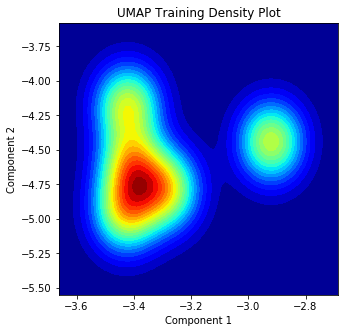

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.kdeplot(embed[:,0], embed[:,1], 
                 shade=True, shade_lowest=True, gridsize=80, levels=30, cmap='jet',cbar=False)
ax.set(xlabel='Component 1', ylabel='Component 2', title="UMAP Training Density Plot")
# ax.grid(True)
plt.show()

In [14]:
embed.shape

(5, 2)

In [13]:
max_cluster = 40
cluster_list = range(1, max_cluster)
bic_list = []
for i in tqdm(cluster_list):
    gmm = GaussianMixture(n_components=i)
    gmm.fit(embed)
    bic_list.append(gmm.bic(embed))
    
min_idx = np.argmin(bic_list)
# plot
plt.plot(cluster_list, bic_list, marker="o", c='k', markersize=5)
plt.scatter(min_idx+1, bic_list[min_idx], s=120, edgecolors='r', facecolors='none')
plt.xlabel("Number of Clusters"); plt.ylabel("BIC"); plt.title("Bayesian information criterion")
plt.show()

ValueError: Expected n_samples >= n_components but got n_components = 6, n_samples = 5

In [ ]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=11)
gmm_label = gmm.fit_predict(embed)

In [ ]:
num_clusters = np.max(gmm_label) + 1
# compute probability
prob = np.max(gmm.predict_proba(embed), axis=1)

# choose color palette
color_palette = sns.color_palette('hls', num_clusters)
cluster_colors = [color_palette[x] for x in gmm_label]
cluster_member_colors = np.array([sns.desaturate(x, p) for x, p in zip(cluster_colors, prob)])

# create figures
plt.subplots(figsize=(5, 5))
for i in range(num_clusters):
    idx = (gmm_label==i)
    plt.scatter(embed[idx,0], embed[idx,1], 
                c=cluster_member_colors[idx], 
                alpha=1, s=7, label=i)
    plt.annotate(i, gmm.means_[i], fontsize=14, fontweight='bold')
    
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', markerscale=3)
plt.xlabel("Component 1"); plt.xlabel("Component 2"); plt.title("Behavioral Manifold")
plt.show()